In [0]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.datasets import fetch_openml
from keras.datasets import mnist
import warnings 
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [0]:
# Loading the data from Mnist dataset

mnist = fetch_openml("mnist_784")
X, y = mnist["data"], mnist["target"]
print('Data size: {0} x {1} and label size {2}'.format(X.shape[0],X.shape[1],y.shape[0]))
print('The images are of size: {0} x {0}'.format(math.sqrt(X.shape[1])))
print('The images are of size: {0} x {0}'.format(math.sqrt(X.shape[1])))

Data size: 70000 x 784 and label size 70000
The images are of size: 28.0 x 28.0
The images are of size: 28.0 x 28.0


In [0]:
shuffle_index = np.random.permutation(70000)

# reshuffle the data and use 60000 samples as training and 10000 as test

X_train, X_test, y_train, y_test = X[shuffle_index[:60000],:], X[shuffle_index[60000:],:], y[shuffle_index[:60000]], y[shuffle_index[60000:]]


In [0]:
# Multi-perceptron 

MLP_Classifier = MLPClassifier(max_iter=300,solver='sgd',verbose='true',validation_fraction=0.0)
MLP_Classifier.fit(X_train, y_train)

Iteration 1, loss = inf
Iteration 2, loss = 1.22106550
Iteration 3, loss = 0.89270735
Iteration 4, loss = 0.77851909
Iteration 5, loss = 0.68629542
Iteration 6, loss = 0.58802617
Iteration 7, loss = 0.53960462
Iteration 8, loss = 0.51686067
Iteration 9, loss = 0.49341693
Iteration 10, loss = 0.47048605
Iteration 11, loss = 0.46075755
Iteration 12, loss = 0.43896995
Iteration 13, loss = 0.42742762
Iteration 14, loss = 0.40910564
Iteration 15, loss = 0.39909170
Iteration 16, loss = 0.39013101
Iteration 17, loss = 0.38048070
Iteration 18, loss = 0.37244670
Iteration 19, loss = 0.36940317
Iteration 20, loss = 0.35930611
Iteration 21, loss = 0.35627667
Iteration 22, loss = 0.35254422
Iteration 23, loss = 0.34635525
Iteration 24, loss = 0.34307435
Iteration 25, loss = 0.33983943
Iteration 26, loss = 0.33759595
Iteration 27, loss = 0.32962254
Iteration 28, loss = 0.33138170
Iteration 29, loss = 0.32532515
Iteration 30, loss = 0.32341926
Iteration 31, loss = 0.31873211
Iteration 32, loss = 0.3

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=300, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.0, verbose='true', warm_start=False)

In [0]:
y_pred = MLP_Classifier.predict(X_train)
print('Classifier accuracy on the training set is {0} '.format(accuracy_score(y_train, y_pred)))
y_pred_test = MLP_Classifier.predict(X_test)
print('Classifier accuracy on the testing set is {0} '.format(accuracy_score(y_test, y_pred_test)))

Classifier accuracy on the training set is 0.9555 
Classifier accuracy on the testing set is 0.9245 


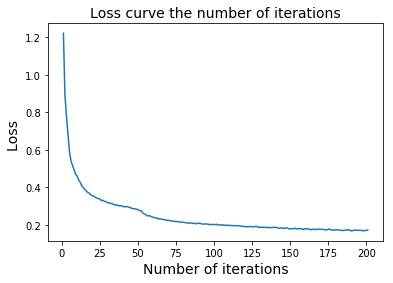

In [0]:
# ploting loss

loss = MLP_Classifier.loss_curve_
plt.title("Loss curve the number of iterations" , fontsize=14)
plt.xlabel("Number of iterations" , fontsize=14)
plt.ylabel("Loss " , fontsize=14)
plt.plot(loss)
plt.show()

In [0]:
y_train_pred = MLP_Classifier.predict(X_train)
y_test_pred = MLP_Classifier.predict(X_test)
conf_train  = confusion_matrix(y_train, y_train_pred)
conf_test  = confusion_matrix(y_test, y_test_pred)
print('Confusion matrix (training): \n{0}'.format(conf_train))
print('Confusion matrix (test): \n{0}'.format(conf_test))

Confusion matrix (training): 
[[5781    0    5   13    7    7   22    2   25   22]
 [   1 6641   18   28    6    2   15   25   14   14]
 [  46    6 5696  102   16    5   52   71   33    7]
 [  20    1   88 5744    4   25   13   52   86   77]
 [  16    9   14    4 5454    1   73   13    6  241]
 [  22    2   11   97    0 5129   79    8   28   38]
 [  27    6   30    8   19   25 5768    0   17    0]
 [   2   14   53   37   10    2    1 6055    2   63]
 [  28   34   59  134    4   59   98   29 5286  113]
 [  36   12    0   65   27    8    3   30   23 5776]]
Confusion matrix (test): 
[[ 982    0    4    5    2    4   10    2    4    6]
 [   0 1080    7    7    0    1    4    1    9    4]
 [   6    4  856   31    7    5   17   17   13    0]
 [   7    2   20  929    1   19   10   12   17   14]
 [   5    2    6    2  884    1   11    6    5   71]
 [   4    1    1   20    0  829   14    4   11   15]
 [   6    2    9    2    8   13  928    0    6    2]
 [   2    6   19   11    3    0    0  991 

In [0]:
def plot_confusion_matrix(matrix):

    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

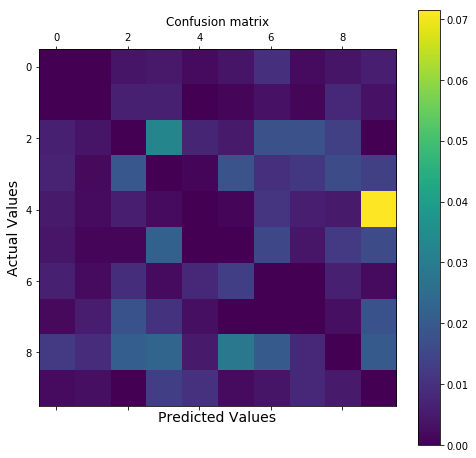

In [0]:
row_total = conf_test.sum(axis=1, keepdims=True)
mx = conf_test / row_total
np.fill_diagonal(mx, 0)
plot_confusion_matrix(mx)
plt.title("Confusion matrix")
plt.xlabel("Predicted Values", fontsize=14)
plt.ylabel("Actual Values", fontsize=14)  
plt.show()

In [0]:
# MLP with dropouts 

# define model

num_classes = 10
batch_size = 128

shuffle_index = np.random.permutation(70000)

# reshuffle the data and use 60000 samples as training and 10000 as test

X_train, X_test, y_train, y_test = X[shuffle_index[:60000],:], X[shuffle_index[60000:],:], y[shuffle_index[:60000]], y[shuffle_index[60000:]]

# nomalizing train and test data

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(784,)))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=50,
                    verbose=1,
                    validation_data=(X_test, y_test))



score_train = model.evaluate(X_train,y_train,verbose=0)
score_test = model.evaluate(X_test, y_test, verbose=0)

print('Train loss:', score_train[0])
print('Train accuracy:', score_train[1]*100)
print('Test loss:', score_test[0])
print('Test accuracy:', score_test[1]*100)

60000 train samples
10000 test samples




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
________________________

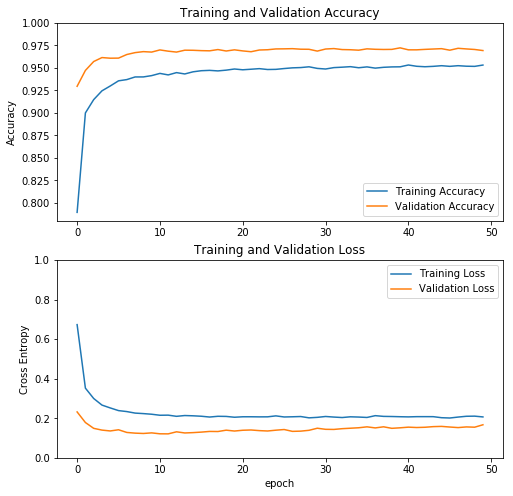

In [0]:
# grah for training and testing 

acc =history.history['acc']
val_acc =history.history['val_acc']
loss =history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')


plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [0]:
# MLP with batch normalization 

# define model

num_classes = 10
batch_size = 128

shuffle_index = np.random.permutation(70000)

# reshuffle the data and use 60000 samples as training and 10000 as test

X_train, X_test, y_train, y_test = X[shuffle_index[:60000],:], X[shuffle_index[60000:],:], y[shuffle_index[:60000]], y[shuffle_index[60000:]]

# nomalizing train and test data

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(784,)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history_batch = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=50,
                    verbose=1,
                    validation_data=(X_test, y_test))



score_train = model.evaluate(X_train,y_train,verbose=0)
score_test = model.evaluate(X_test, y_test, verbose=0)

print('Train loss:', score_train[0])
print('Train accuracy:', score_train[1]*100)
print('Test loss:', score_test[0])
print('Test accuracy:', score_test[1]*100)

60000 train samples
10000 test samples
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)

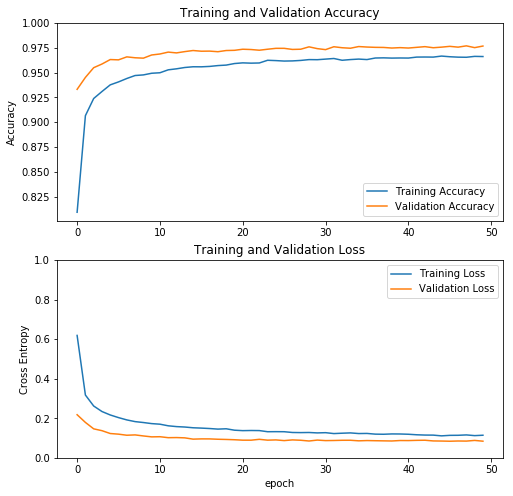

In [0]:
# grah for training and testing 

acc =history_batch.history['acc']
val_acc =history_batch.history['val_acc']
loss =history_batch.history['loss']
val_loss = history_batch.history['val_loss']
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')


plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()